<a href="https://colab.research.google.com/github/Jahnvi99/Leuphana-Intern/blob/master/logpdf_Probability_of_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gpytorch

     |████████████████████████████████| 501kB 29.2MB/s 


In [2]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import simps
from numpy import trapz
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
def gaussian(x):
  return (torch.tensor(norm.logpdf(x))).float()    

X = torch.linspace(-3, 3, 1200)
#mean = 0.0
#std = 1.0
y = gaussian(X)

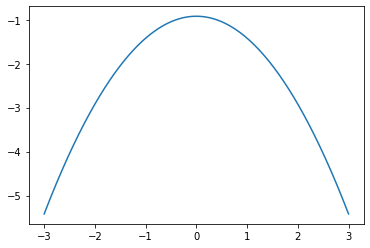

In [4]:
plt.plot(X,y)
plt.show()

In [5]:
# Using the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [6]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()

In [7]:
X_sample = torch.tensor([ 1.3567,  2.2485, -2.6980])
y_sample = gaussian(X_sample)

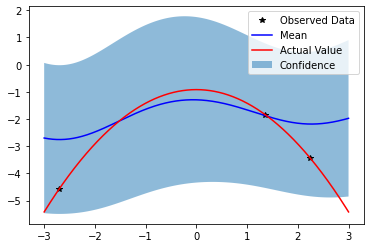

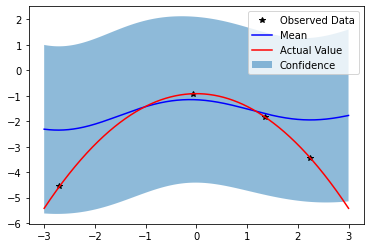

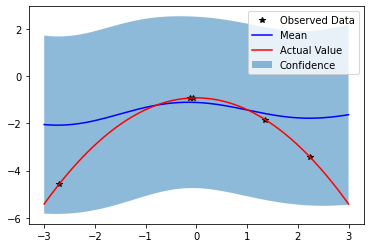

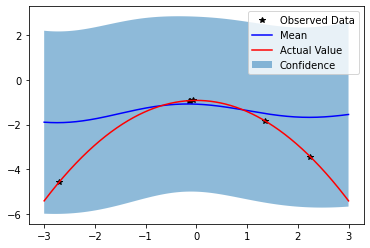

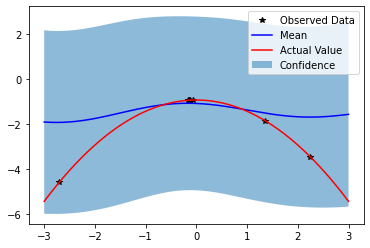

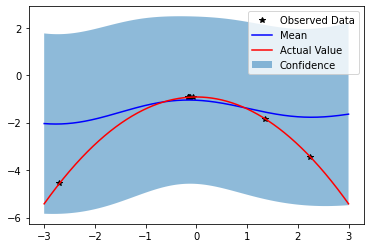

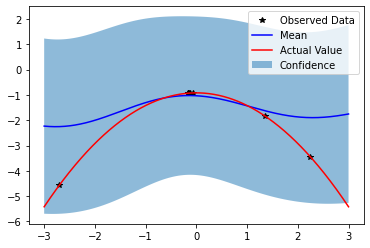

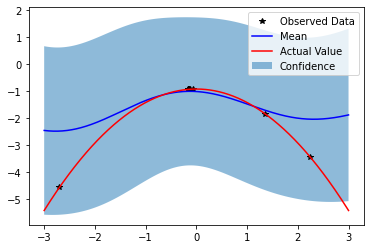

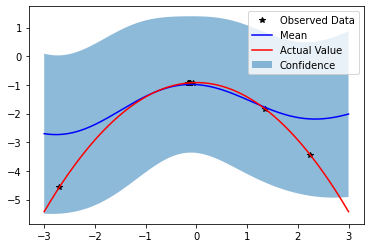

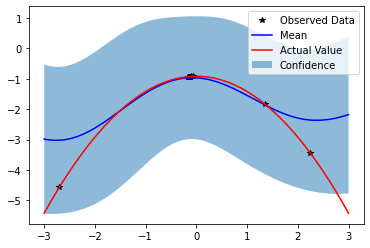

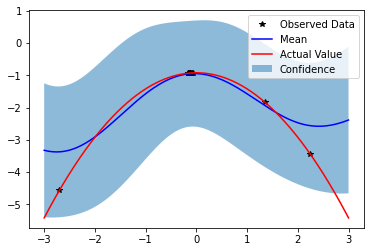

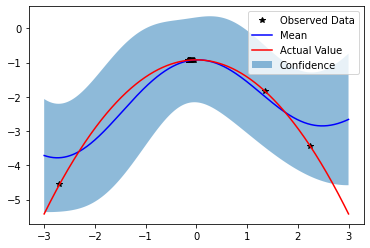

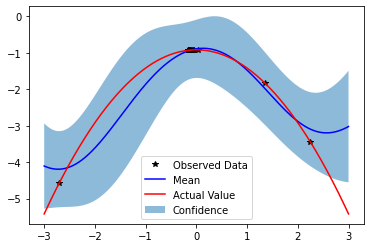

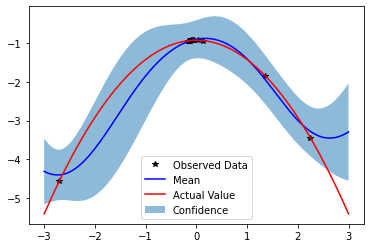

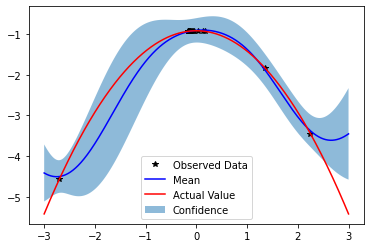

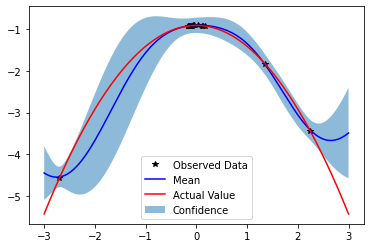

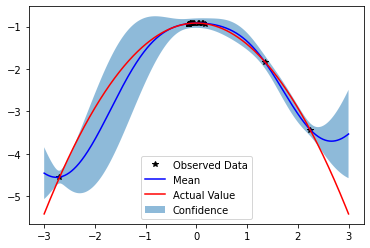

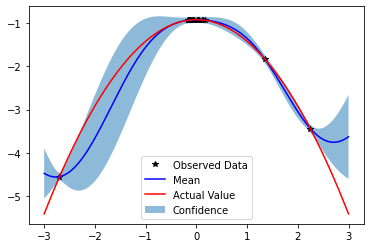

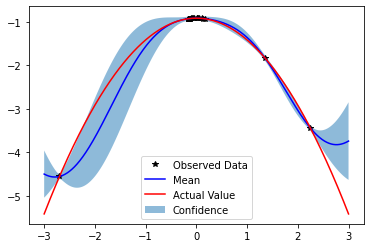

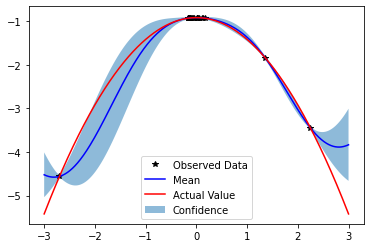

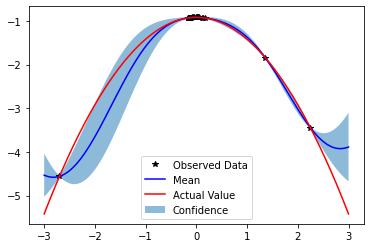

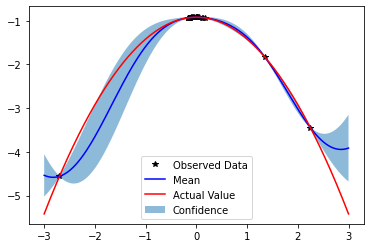

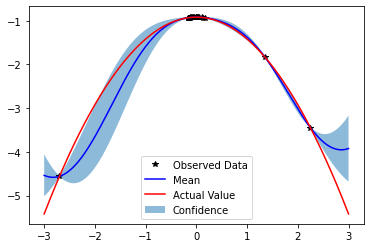

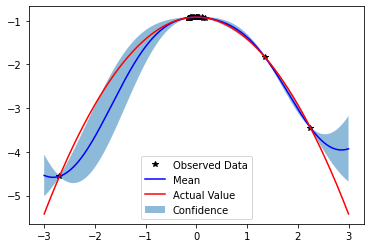

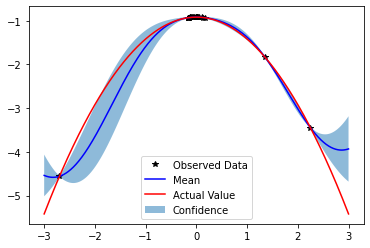

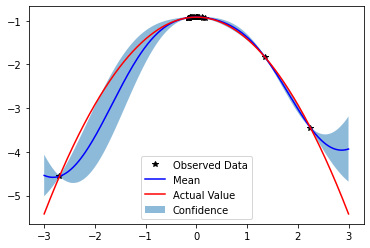

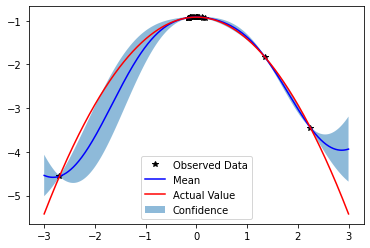

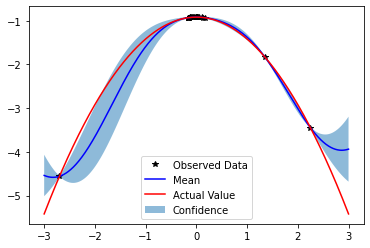

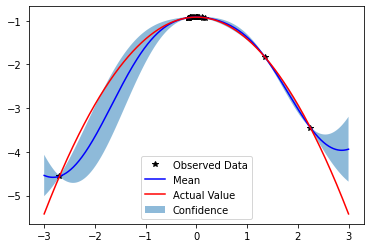

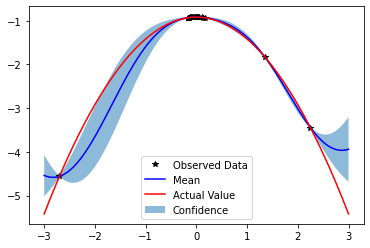

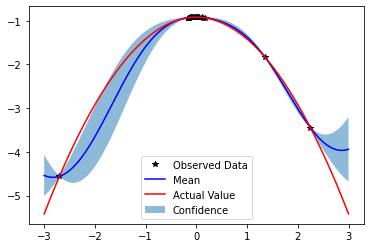

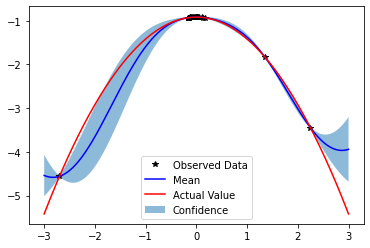

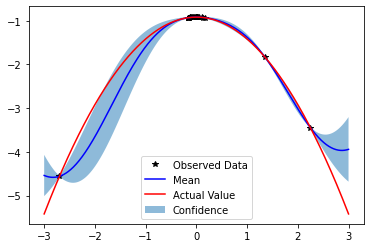

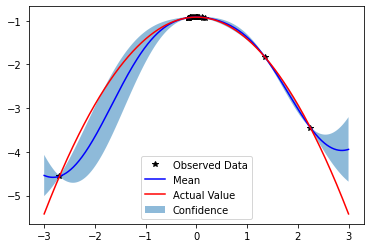

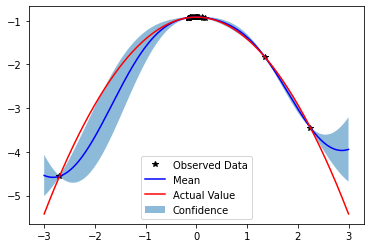

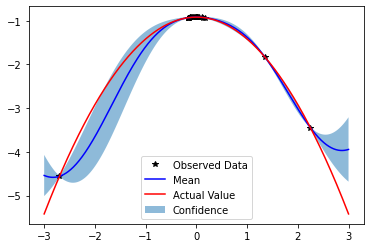

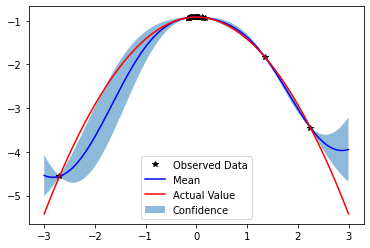

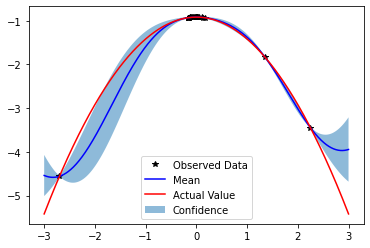

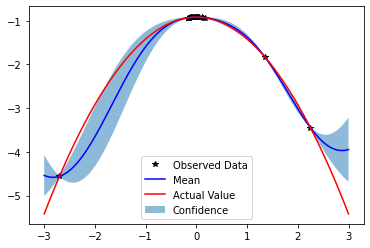

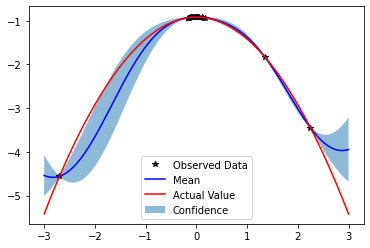

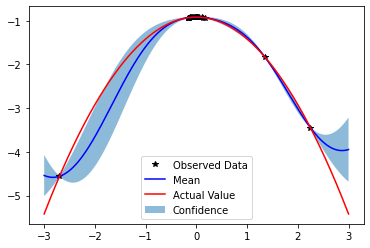

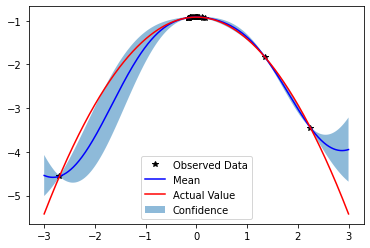

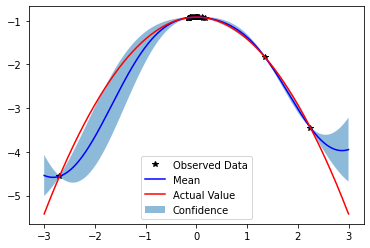

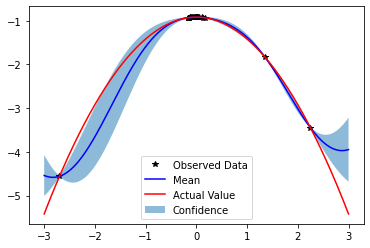

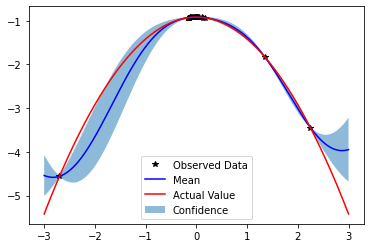

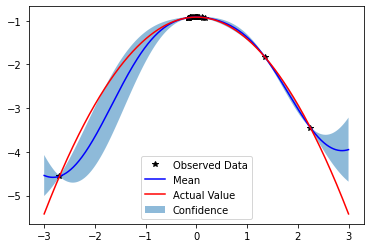

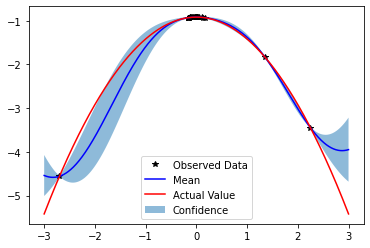

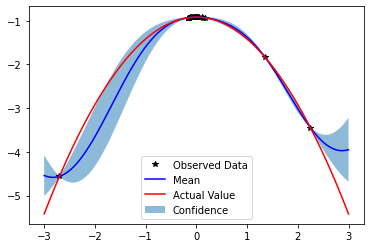

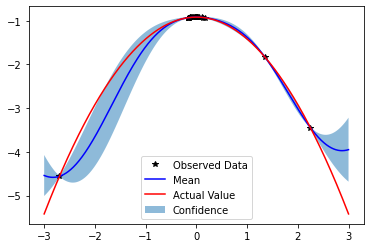

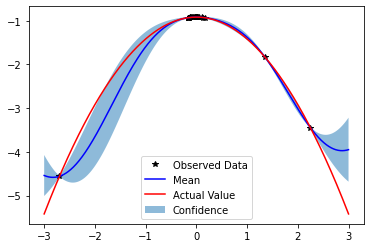

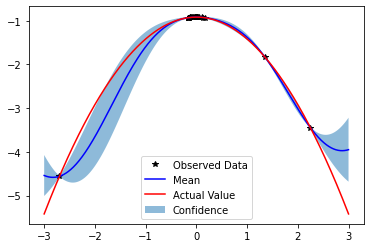

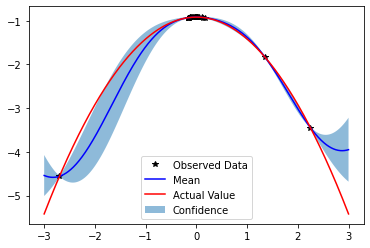

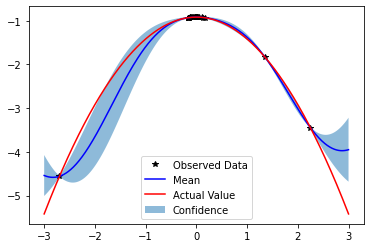

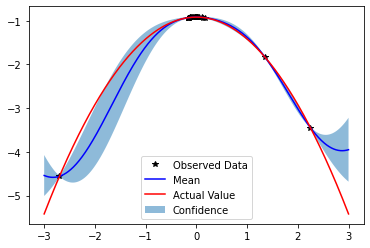

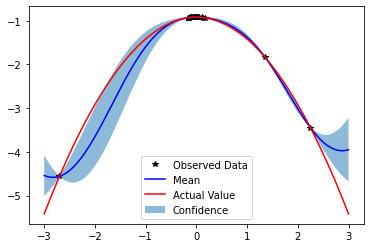

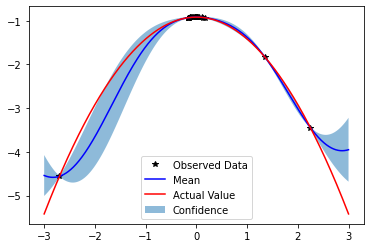

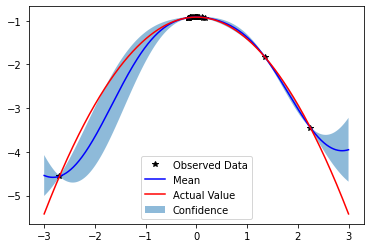

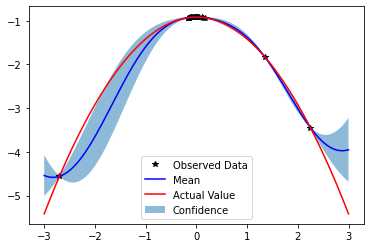

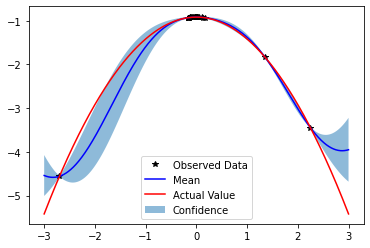

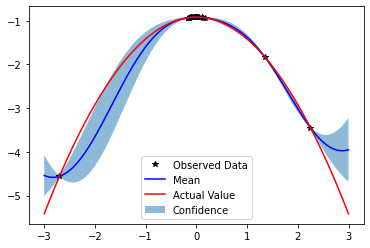

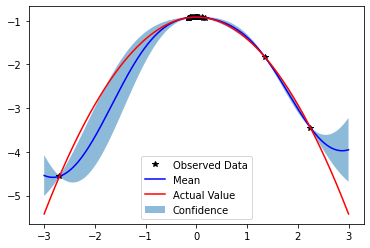

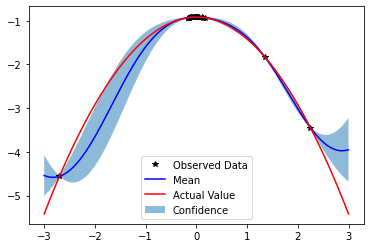

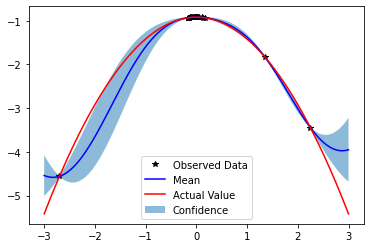

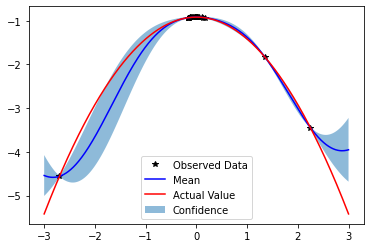

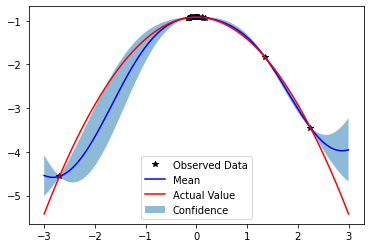

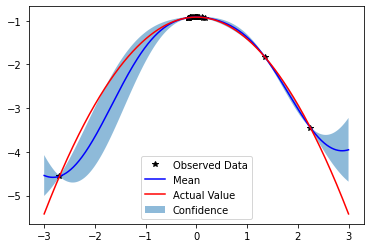

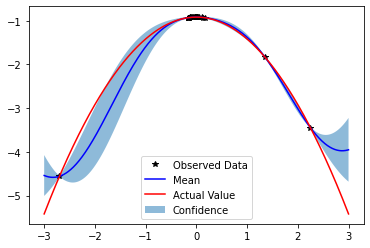

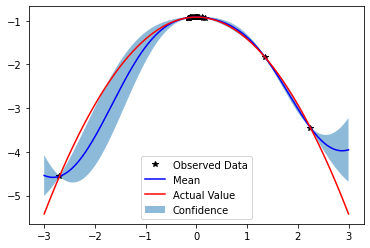

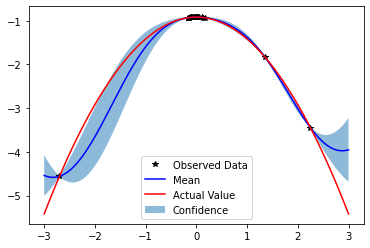

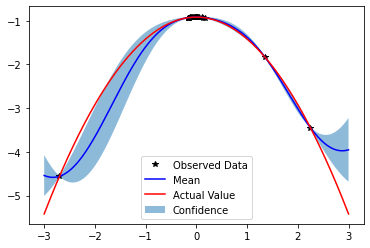

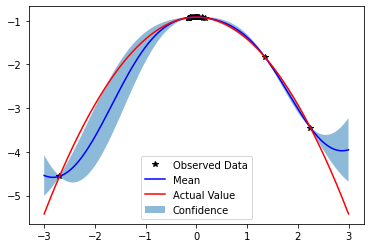

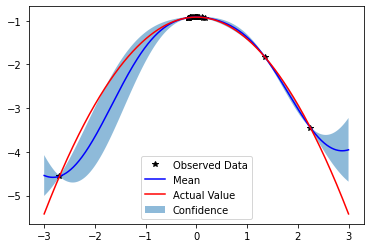

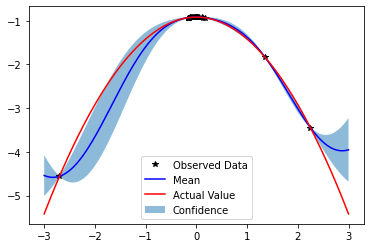

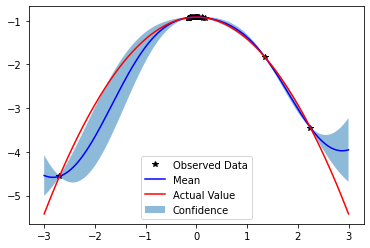

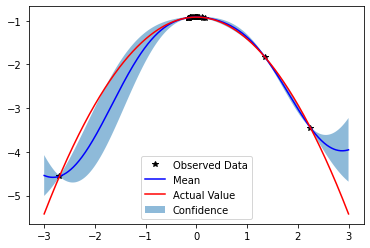

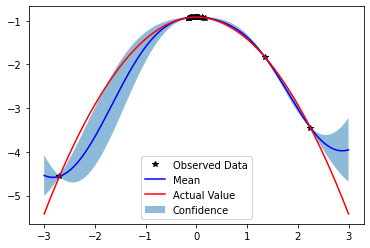

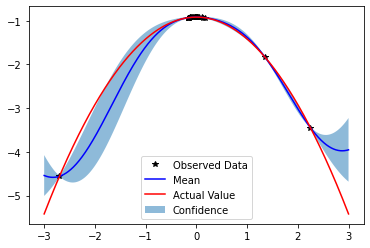

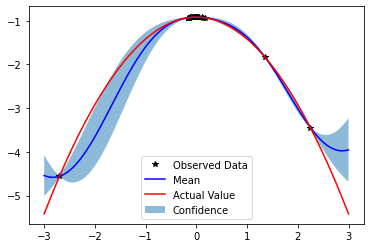

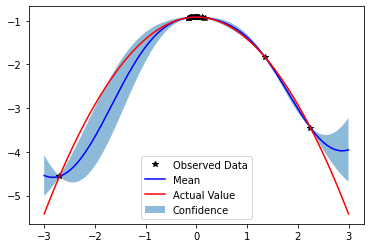

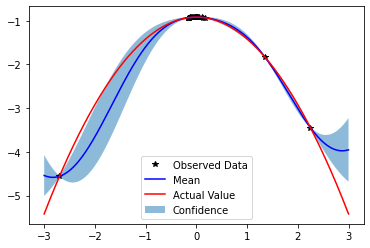

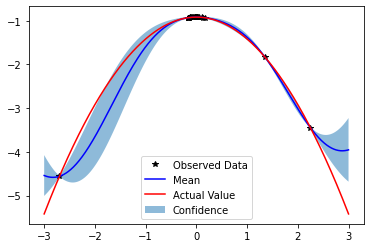

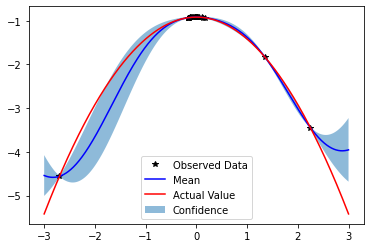

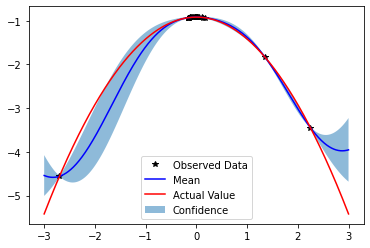

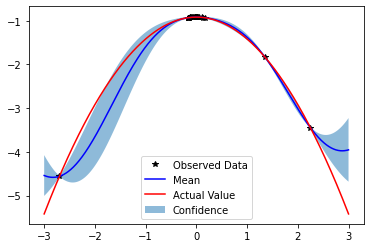

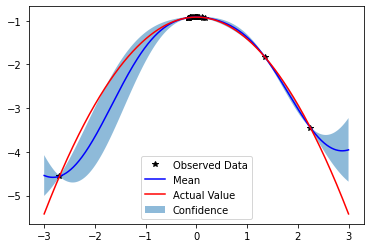

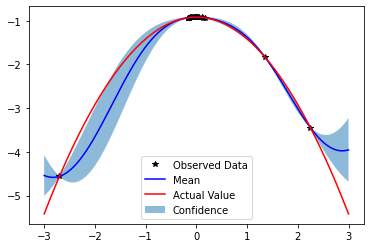

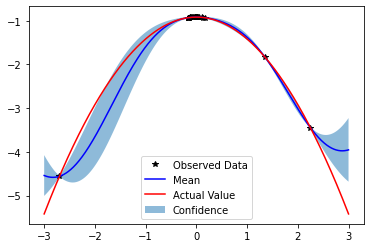

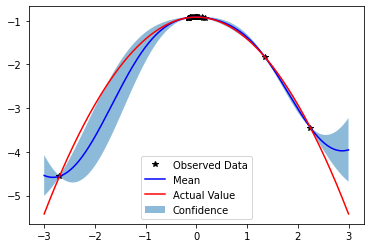

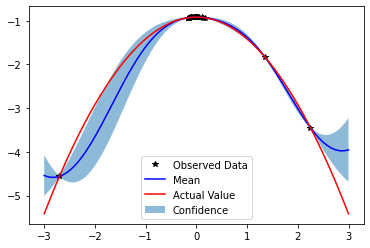

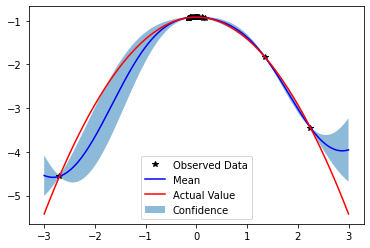

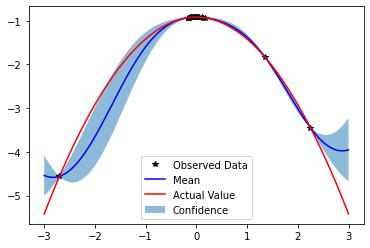

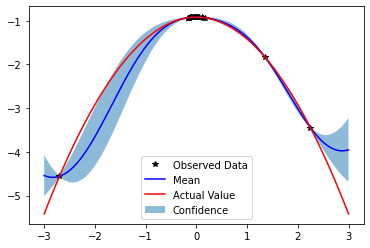

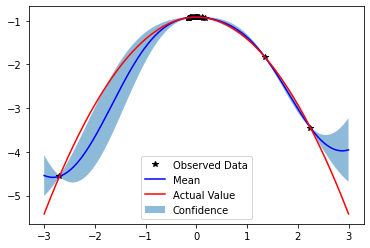

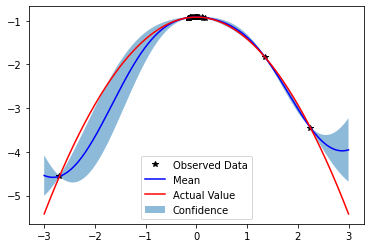

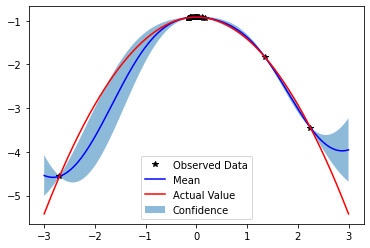

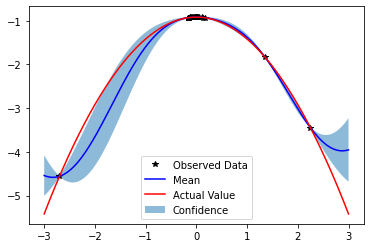

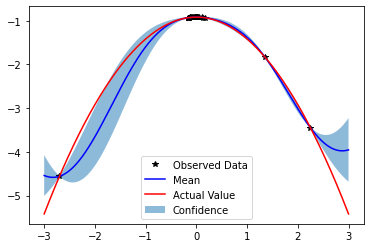

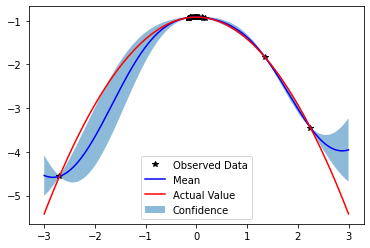

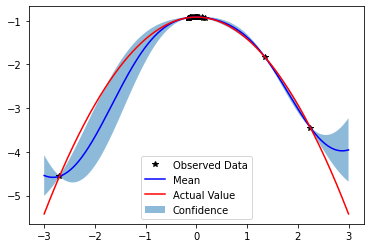

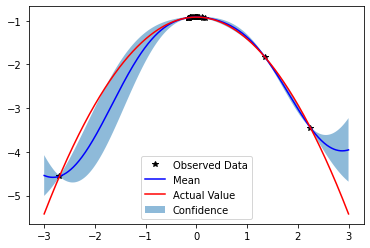

In [8]:
area1 = []
area2 = []
for i in range(100):
  model = ExactGPModel(X_sample, y_sample, likelihood)
  model.train()
  likelihood.train()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
  mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
  for i in range(10):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(X_sample)
    # Calc loss and backprop gradients
    loss = -mll(output, y_sample)
    loss.backward()
    optimizer.step()

  model.eval()
  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = X
    observed_pred = likelihood(model(test_x))
  with torch.no_grad():
    # Initialize plot
    #f, ax = plt.subplots()
    # Get standard deviation
    std = np.sqrt(observed_pred.variance.numpy())
    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    mean = observed_pred.mean.numpy()
    #lower, upper = mean - std, mean + std
    # Plot training data as black stars
    plt.plot(X_sample.numpy(), y_sample.numpy(), 'k*')
    # Plot predictive means as blue line
    plt.plot(test_x.numpy(), mean, 'b')
    # Plot actual function as red line
    plt.plot(test_x.numpy(), y.numpy(), 'r')
    # Shade between the lower and upper confidence bounds
    plt.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    #ax.set_ylim([-3, 3])
    plt.legend(['Observed Data', 'Mean', 'Actual Value','Confidence'])
    plt.show()
  mu = observed_pred.mean
  sigma = torch.sqrt(observed_pred.variance)
  best_mu = torch.max(mu)
  idx = torch.argmax(torch.from_numpy(norm.cdf((mu - best_mu - 1E-15) / (sigma))))
  p = torch.unsqueeze(X[idx], 0)
  y_int = np.exp(observed_pred.mean.numpy()) 
  area1.append(trapz(y_int, dx=0.005))
  area2.append(simps(y_int, dx=0.005))  
  X_sample = torch.cat((X_sample, p))
  y_sample = gaussian(X_sample)     

In [9]:
plot_1 = []
plot_2 = []
for i in range(0,len(area1),5):
  plot_1.append(area1[i])
  plot_2.append(area2[i])

size = list(X_sample.shape)
x = []
for i in range(3, size[0], 5):
  x.append(i)

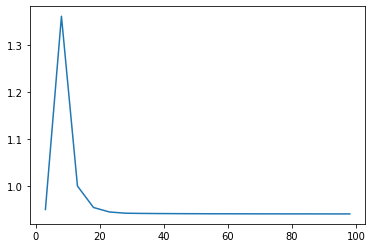

In [10]:
plt.plot(x,plot_1)
plt.show()

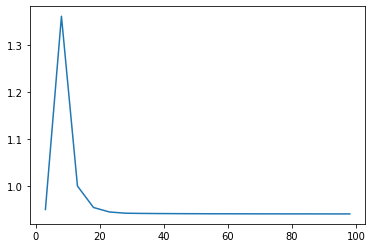

In [11]:
plt.plot(x, plot_2)
plt.show()

In [12]:
X_sample[0:3]

tensor([ 1.3567,  2.2485, -2.6980])

In [13]:
area1

[0.95117426,
 1.1637161,
 1.3109065,
 1.4099027,
 1.4221888,
 1.3608358,
 1.2870878,
 1.21348,
 1.1415251,
 1.0706761,
 1.0009241,
 0.93920803,
 0.90473473,
 0.9098557,
 0.9350481,
 0.95539767,
 0.9599662,
 0.9564986,
 0.95166653,
 0.94805855,
 0.94582736,
 0.9446072,
 0.9439674,
 0.94363415,
 0.94341254,
 0.9432628,
 0.94314826,
 0.9430427,
 0.94295895,
 0.94287986,
 0.9427997,
 0.9427568,
 0.94268966,
 0.9426496,
 0.9425961,
 0.9425452,
 0.9425086,
 0.94247204,
 0.94241995,
 0.9423854,
 0.9423739,
 0.942346,
 0.9422905,
 0.9422834,
 0.942251,
 0.94222164,
 0.94221103,
 0.94219136,
 0.9421524,
 0.9421468,
 0.942117,
 0.9421309,
 0.94211763,
 0.9420739,
 0.94207937,
 0.9420364,
 0.9420346,
 0.94200444,
 0.94202614,
 0.94199884,
 0.9419979,
 0.9419754,
 0.9419775,
 0.9419571,
 0.9419528,
 0.941933,
 0.9419098,
 0.94190437,
 0.94190234,
 0.9418926,
 0.941902,
 0.9418978,
 0.9418779,
 0.94188565,
 0.94184965,
 0.94184947,
 0.9418535,
 0.9418272,
 0.94182605,
 0.94183433,
 0.94184446,
 0.9

In [14]:
area2

[0.951174159757793,
 1.1637157752364873,
 1.3109063512459398,
 1.4099026749283075,
 1.4221884606406092,
 1.3608356823027135,
 1.2870875560864805,
 1.2134799167513848,
 1.141525062099099,
 1.070675986437127,
 1.000924009149894,
 0.9392078965716064,
 0.9047346731927246,
 0.9098556647798978,
 0.9350480702193454,
 0.9553976596822031,
 0.9599661314999685,
 0.9564986034738832,
 0.9516665013926103,
 0.9480586160579696,
 0.9458273066813127,
 0.9446071796887554,
 0.9439673717971891,
 0.9436342462804168,
 0.943412586254999,
 0.943262747391127,
 0.9431482799444347,
 0.9430426537478342,
 0.942958910043817,
 0.9428799355914816,
 0.9427997753163799,
 0.942756698327139,
 0.942689663101919,
 0.9426496954192407,
 0.9425961370067671,
 0.9425452034245245,
 0.9425086354813539,
 0.942472018704284,
 0.9424199525453151,
 0.9423854796402157,
 0.9423738995427265,
 0.9423460446158424,
 0.9422905936138705,
 0.9422834846004844,
 0.9422510432708077,
 0.9422215812862851,
 0.9422110788151622,
 0.9421913910005242,
 0